Natural Language Processing
Review Data from Airbnb

In [318]:
#Read in libraries
import pandas as pd
import swifter
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import sklearn

In [319]:
#Settings for notebook
#Ignore warnings
import warnings; warnings.simplefilter('ignore')

#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)

In [320]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Read in data
reviews = pd.read_csv(path + '/01_10_2020_Reviews_Processed_Text_Analysis.csv',sep=',',
                 parse_dates=['date'])

In [321]:
reviews.head().T

,0,1,2,3,4
comments,"Great stay. Place is large and a great value. Five stars! One note on the bed (other guests commented). I am 6’2’’ and could sleep ok on it. There is a footboard, though, so I had to sleep diagonally.",I had the best experience ever in Airbnb with Maria. I can say the best decision I've made in SF trip was to stay in Maria's place. I sincerely appreciate her warm hospitality and thoughtful communications.,"Je was very hospitable & sweet. The common area was super clean. It was cleaned every day. Je made sure we were comfortable & wanted to make sure we felt like we were at home. It was my friend & I's first private room experience (we usually rent the entire home). It was definitely a great first experience. The location was also perfect. It was 10-15 minutes to all the places we wanted to go to, such a downtown, the tourist attractions, etc. I'll definitely be back to visit again & definitely wouldn't mind staying at Je & Derren's place again. They're wonderful hosts.","I felt genuinely welcome at Tammy and Gabriel's, thanks a lot guys, it was almost like visiting friends. That's the number one thing in this business, the facilities come as a big bonus on top. The house stays in a quiet corner of an otherwise happening neighbourhood with a huge concentration of restaurants, cafés, bars, late night art exhibitions and hipster book stores, you really can't look for a better place to feel like home. The whole apartment is superbly decorated and your room comes with a great view of the neighbourhood, I'll note that it features the best bed I've ever slept on (I enjoy my mattress firm) and has a flatscreen TV of roughly the same size with a big box of DVDs for your business travelling pleasure. I'll rate my stay on Alabama Street a ten out of ten and I would love to come back for another stay, in fact I've already made arrangements for this.","we loved staying with caro! my friend and i are both huge princess diaries fans, so this was definitely one of the coolest experiences for us and we'd love to come back in the future"
date,2018-09-25 00:00:00,2018-08-08 00:00:00,2017-10-21 00:00:00,2013-10-01 00:00:00,2018-10-03 00:00:00
id_review,328282929,304031277,205287584,7758550,331801305
listing_id,26909554,11437138,20368086,1667732,21220773
reviewer_id,1178520,52206767,151432903,3438775,12008848
reviewer_name,William (Gui),Jihee,Ling,Jesper,Ariel
host_is_superhost,False,True,False,False,False
host_response_time,within a few hours,within an hour,within an hour,within an hour,within a few hours
latitude,37.749,37.7773,37.7466,37.7551,37.7206
longitude,-122.481,-122.411,-122.478,-122.41,-122.429


Histogram of sentiment scores

Text(0.5, 1.0, 'Compound')

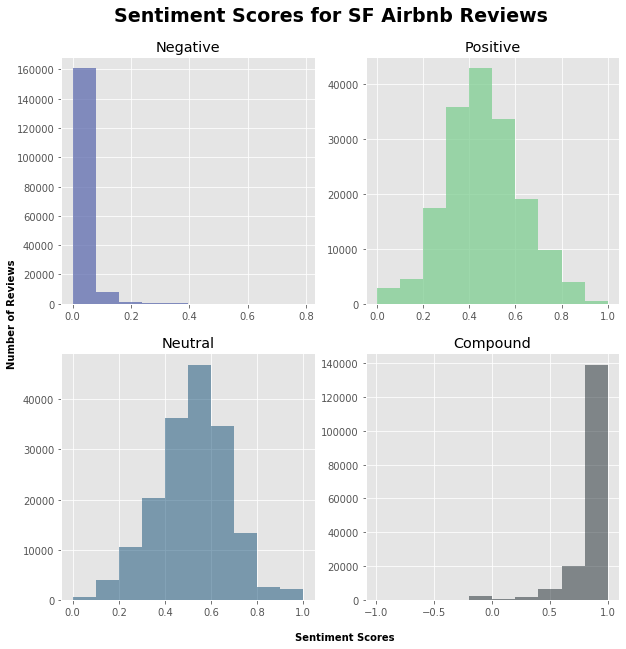

In [322]:
#Set style 
plt.style.use('ggplot')

#Set plot
fig, ax = plt.subplots(2,2, figsize = (10,10))

fig.suptitle('Sentiment Scores for SF Airbnb Reviews',fontsize =19,fontweight = 'bold', y =.95)
fig.text(.45,.07, 'Sentiment Scores', fontweight='bold')
fig.text(.05,.45, 'Number of Reviews', fontweight='bold', rotation = 'vertical')

#Plot 4 histograms
ax1 = reviews.sentiment_neg.hist(ax = ax[0,0], color = '#5f6caf', alpha = .75)
ax1.set_title("Negative")

ax2 = reviews.sentiment_pos.hist(ax = ax[0,1], color = '#7fcd91',alpha = .75)
ax2.set_title("Positive")

ax3 = reviews.sentiment_neu.hist(ax = ax[1,0], color = '#0f4c75',alpha = .5)
ax3.set_title("Neutral")

ax4 = reviews.sentiment_compound.hist(ax = ax[1,1], color = '#1b262c',alpha = .5)
ax4.set_title("Compound")


In [345]:
#Statistics in reference to sentiment scores
percentiles = reviews['sentiment_compound'].describe(percentiles=[.018,.02,.03,.04,.05,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
percentiles

count    170942.000000
mean          0.864432
std           0.193363
min          -0.989000
1.8%          0.025800
2%            0.177900
3%            0.401900
4%            0.440400
5%            0.493900
10%           0.658800
20%           0.811400
30%           0.872000
40%           0.909300
50%           0.933200
60%           0.950100
70%           0.963300
80%           0.973800
90%           0.983400
max           0.999300
Name: sentiment_compound, dtype: float64

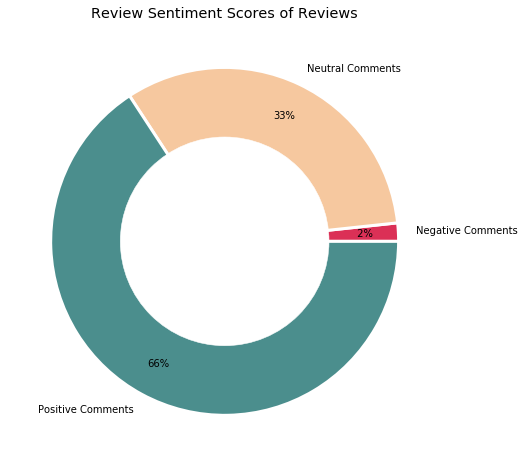

In [346]:
#Ranges for data
neg = percentiles['1.8%']
neu = percentiles['5%']
pos = percentiles['max']

#Set labels
names = ['Negative Comments', 'Neutral Comments', 'Positive Comments']
size = [neg,neu, pos]

#Set inner circle
my_circle=plt.Circle( (0,0), 0.6, color='white')

plt.title('Review Sentiment Scores of Reviews')
      
plt.pie(size, labels=names, autopct='%2.f%%', pctdistance=.8, colors = ['#db3056','#f6c89f','#4b8e8d'],
       wedgeprops={'linewidth': 3, 'edgecolor':'white'})

fig=plt.gcf()
fig.set_size_inches(8,8)


#Fit inner circle
fig.gca().add_artist(my_circle)
plt.show()


Our reviews are very positive. 
Let's compare the differences between the very positive comments and the very negative ones

## Differences in review length

In [325]:
reviews.head(3)

,comments,date,id_review,listing_id,reviewer_id,reviewer_name,host_is_superhost,host_response_time,latitude,longitude,neighbourhood_cleansed,number_of_reviews,room_type,comments_parsed,sentiment_neg,sentiment_pos,sentiment_neu,sentiment_compound
0,"Great stay. Place is large and a great value. Five stars! One note on the bed (other guests commented). I am 6’2’’ and could sleep ok on it. There is a footboard, though, so I had to sleep diagonally.",2018-09-25,328282929,26909554,1178520,William (Gui),False,within a few hours,37.74905,-122.48099,Outer Sunset,29,Entire home/apt,"Great stay. Place large great value. Five stars! One note bed (other guests commented). I 6’2’’ could sleep ok it. There footboard, though, I sleep diagonally.",0.0,0.396,0.604,0.9200
1,I had the best experience ever in Airbnb with Maria. I can say the best decision I've made in SF trip was to stay in Maria's place. I sincerely appreciate her warm hospitality and thoughtful communications.,2018-08-08,304031277,11437138,52206767,Jihee,True,within an hour,37.77733,-122.41078,South of Market,150,Private room,I best experience ever Airbnb Maria. I say best decision I've made SF trip stay Maria's place. I sincerely appreciate warm hospitality thoughtful communications.,0.0,0.555,0.445,0.9565
2,"Je was very hospitable & sweet. The common area was super clean. It was cleaned every day. Je made sure we were comfortable & wanted to make sure we felt like we were at home. It was my friend & I's first private room experience (we usually rent the entire home). It was definitely a great first experience. The location was also perfect. It was 10-15 minutes to all the places we wanted to go to, such a downtown, the tourist attractions, etc. I'll definitely be back to visit again & definitely wouldn't mind staying at Je & Derren's place again. They're wonderful hosts.",2017-10-21,205287584,20368086,151432903,Ling,False,within an hour,37.74657,-122.47787,Parkside,77,Private room,"Je hospitable & sweet. The common area super clean. It cleaned every day. Je made sure comfortable & wanted make sure felt like home. It friend & I's first private room experience (we usually rent entire home). It definitely great first experience. The location also perfect. It 10-15 minutes places wanted go to, downtown, tourist attractions, etc. I'll definitely back visit & definitely mind staying Je & Derren's place again. They're wonderful hosts.",0.0,0.462,0.538,0.9921


In [326]:
reviews['comments_length'] = reviews.comments_parsed.apply(len)

positive_reviews = reviews[reviews.sentiment_compound > .99]
negative_reviews = reviews[reviews.sentiment_compound < -.50]

print(len(positive_reviews))
print(len(negative_reviews))

6520
328


Text(0.5, 0, 'Characters')

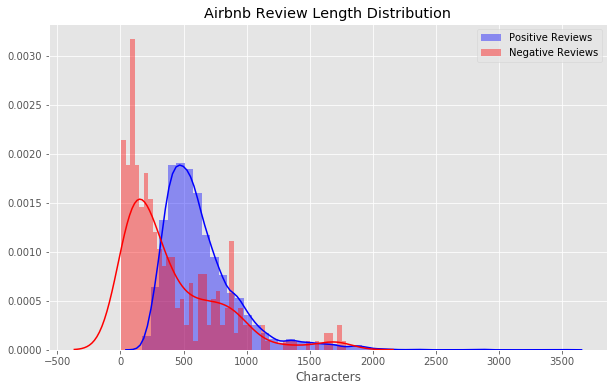

In [327]:
fig, ax = plt.subplots(figsize=(10,6))

#Plot Histogram
sns.distplot(positive_reviews.comments_length, kde = True, bins = 50, color = 'b')
sns.distplot(negative_reviews.comments_length, kde = True, bins = 50, color = 'r')

plt.legend(labels = ['Positive Reviews', 'Negative Reviews'], frameon = True);
ax.set_title('Airbnb Review Length Distribution')
ax.set_xlabel('Characters')

Let's look at a subset of some of these reviews

In [347]:
#Positive reviews
positive_reviews.comments[0:5]

2                                                                                                                                                                                                                                                                                                                                                                                                                                               Je was very hospitable & sweet. The common area was super clean. It was cleaned every day. Je made sure we were comfortable & wanted to make sure we felt like we were at home. It was my friend & I's first private room experience (we usually rent the entire home). It was definitely a great first experience. The location was also perfect. It was 10-15 minutes to all the places we wanted to go to, such a downtown, the tourist attractions, etc. I'll definitely be back to visit again & definitely wouldn't mind staying at Je & Derren's place again. They're wonderful h

In [348]:
#Negative reviews
negative_reviews.comments[0:5]

85                                                                                                                                                                                                                                                                                                                                                                                                     This is a reasonable base for exploring San Fransisco albeit some way out. The building is on a very noisy corner and traffic will wake you in the morning.   The owners do leave some clothes on the floor in their bedroom and other effects around. The bedding on the two "proper" beds is low quality. So it has the feel of a post-grad student flat. OK if you like that sort of thing.   We were unlucky with the fire alarm going off twice at night with several fire trucks arriving both times (1am and 3am). Plus the battery ran out on the door key pad so we were locked out with kids on hot day.  it is what it

Word Clouds


In [330]:
#Positive Word Cloud

In [331]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


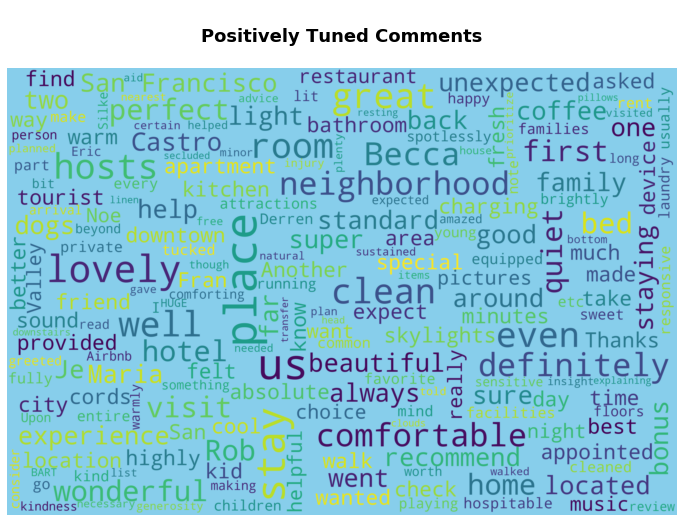

In [332]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="skyblue",
                      width= 3000, height = 2000).generate(str(positive_reviews.comments_parsed.values))

def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()
    
plot_wordcloud(wordcloud, '\nPositively Tuned')

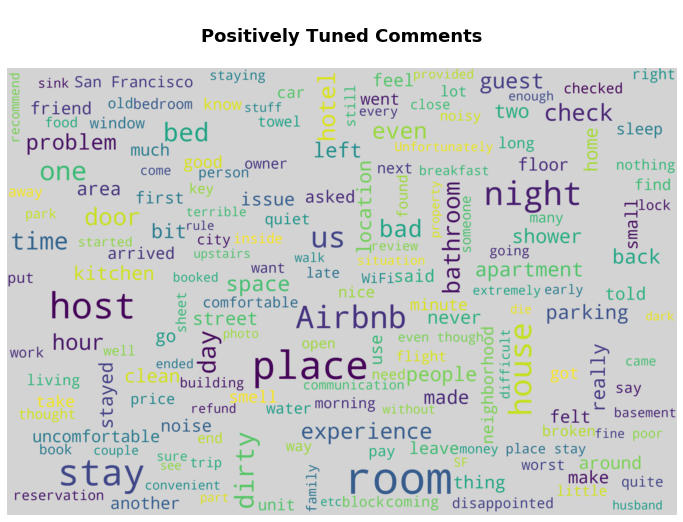

In [333]:
wordcloud = WordCloud(max_font_size=200, max_words=180, background_color="lightgray",
                      width= 3000, height = 2000).generate(str(negative_reviews.comments_parsed.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [334]:
#What are the most popular words in positive reviews?



In [335]:
#What are the most popular words in negative reviews?


In [336]:
#Topic modeling for postive reviews

In [337]:
#What insights can you gain from these?

In [338]:
#Topic modeling for negative reviews

In [339]:
#what insights can you gain?